In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers
import tensorflow as tf

In [3]:
np.random.seed(128)

In [4]:
tf.keras.utils.set_random_seed(100)

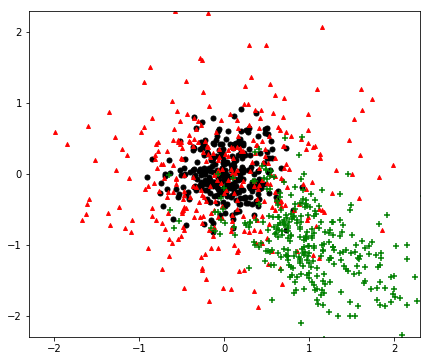

In [5]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

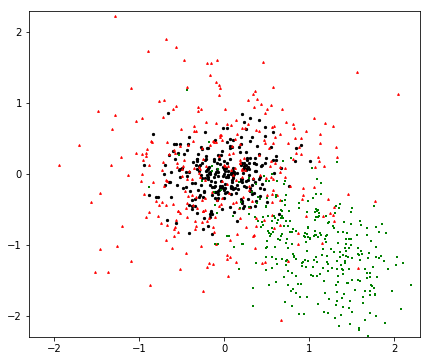

In [6]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=5)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=3)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=8)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

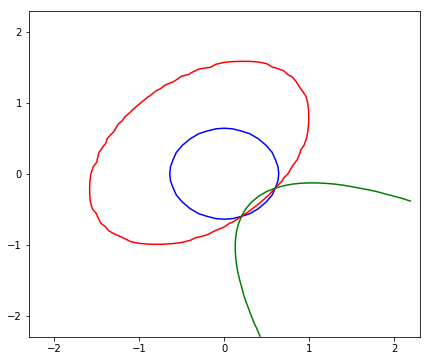

In [7]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


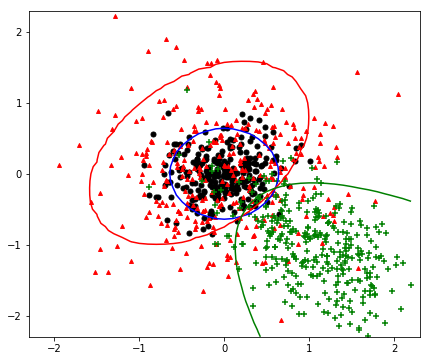

In [8]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [9]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848732
0.2153927930184836


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)


######



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

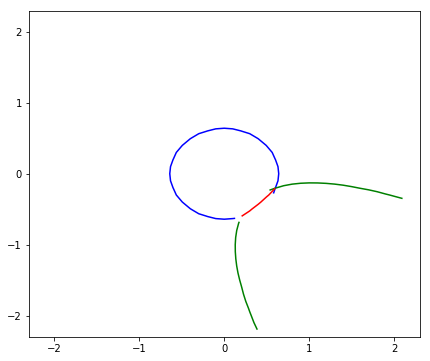

In [12]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.1)
feature_y_rec = np.arange(-0.6, -0.19, 0.1)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

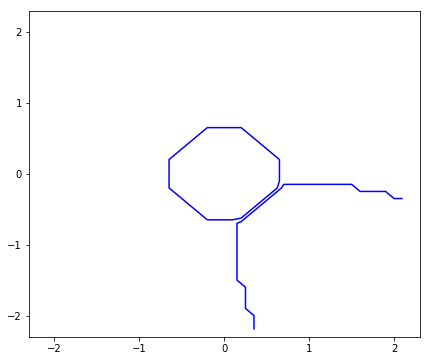

In [13]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z_bayes = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z_bayes, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


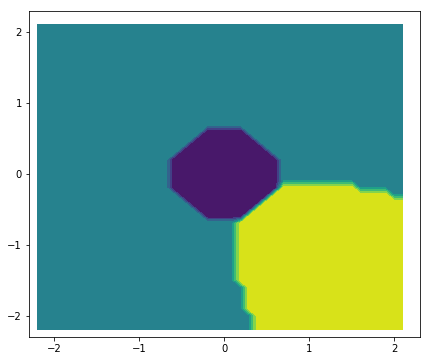

In [14]:
fig, ax = plt.subplots(1, 1)

ax.contourf(grid_X, grid_Y, Z_bayes)

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

We can't use dropout with sklearn's MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [16]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [17]:
(y - 1)[:10]

array([0, 2, 1, 0, 1, 2, 1, 2, 0, 2])

In [18]:
y[:10]

array([1, 3, 2, 1, 2, 3, 2, 3, 1, 3])

In [19]:
y_train[:10]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [20]:
X_train.shape

(900, 2)

In [21]:
X_train

array([[-0.71675527,  0.59345549],
       [ 0.50645529, -1.12435515],
       [ 0.11542139, -1.19147079],
       ...,
       [ 1.34810556, -2.16630639],
       [-0.90440578,  0.5581621 ],
       [-0.53629861,  0.16942755]])

In [22]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [23]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [24]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [27]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train loss: 0.5963438153266907
Train accuracy: 0.7366666793823242


In [28]:
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z_neural_network = np.vectorize(get_predict_result)(grid_X, grid_Y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


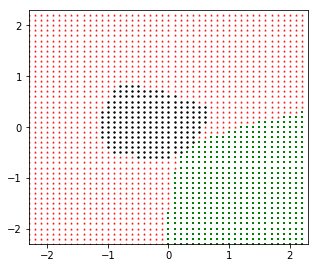

In [29]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

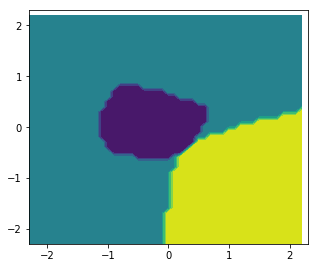

In [30]:
fig, ax = plt.subplots()

ax.contourf(grid_X, grid_Y, Z_neural_network)

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

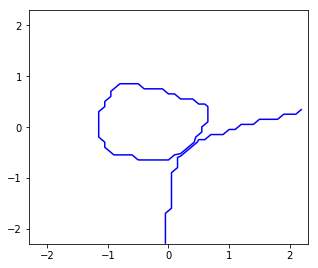

In [31]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

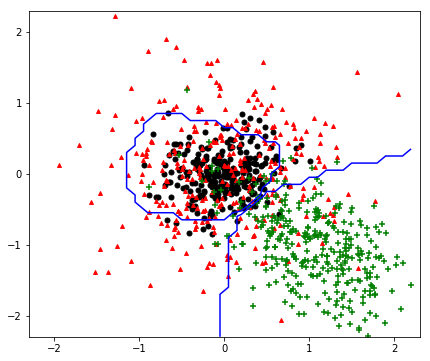

In [32]:
fig, ax = plt.subplots()

plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

### Plot the Neural Network structure weights

In [33]:
from keras.utils.vis_utils import plot_model

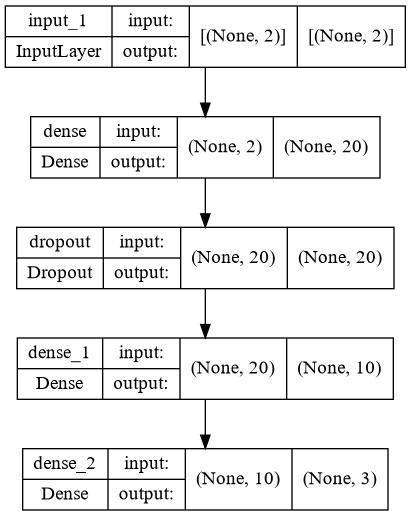

In [34]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [35]:
for layer in model.layers:
    print("\n\n////////////////////////////////////\n")
    print(layer.get_config())
    print("\n")
    print(layer.get_weights())




////////////////////////////////////

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


[array([[-2.8281233 ,  1.1873248 ,  0.5317142 ,  2.4317932 ,  0.12348989,
        -0.5667825 ,  2.3108106 ,  2.2012115 , -2.1262515 ,  0.35029477,
        -0.90911376, -0.5770073 , -0.6529028 , -0.60891736,  1.6458077 ,
        -2.7049203 , -0.16136199,  2.517389  , -2.5583446 ,  2.0147345 ],
       [-0.01917826,  1.6697034 ,  2.1191123 , -1.422621  ,  1.7965157 ,
         2.31092   , -1.4815469 , -1.4331433 ,  0.32761544,  2.270103  ,
         1.9674459 ,  2.480704  ,  2.2798738 ,  2.3414435 , -2.2427657 ,
        -0.53787404,  1.5733187 , -0.9461676 , -1.9143519 ,

In [36]:
model.layers[-1].get_weights()

[array([[ 3.6836544e-01, -8.9634970e-02, -2.3427360e+00],
        [-9.6451957e-03, -4.3161368e-01, -1.4205858e-01],
        [-3.9618030e+00,  1.1847591e+00,  5.8434600e-01],
        [-2.6336243e+00,  2.0363176e+00, -6.9093031e-01],
        [-2.8563321e+00,  2.3161352e+00, -6.3411516e-01],
        [-3.4179368e+00, -6.5232313e-01,  2.3387995e+00],
        [-2.1329353e+00, -8.3065915e-01,  2.1454105e+00],
        [ 1.6881397e-04, -3.3031139e-01, -3.7370566e-02],
        [ 1.5647608e+00, -1.1337823e-02, -1.6880808e+00],
        [-3.6005303e-01, -6.9060117e-02, -1.5667146e+00]], dtype=float32),
 array([ 0.29657686, -0.26740077,  0.02111496], dtype=float32)]

In [37]:
# prepare for Equation (38)

array_beta_0k_hat = model.layers[-1].get_weights()[1]
array_beta_0k_hat

array([ 0.29657686, -0.26740077,  0.02111496], dtype=float32)

In [38]:
# prepare for Equation (B.3)

array_beta_jk_hat = model.layers[-1].get_weights()[0]
array_beta_jk_hat

array([[ 3.6836544e-01, -8.9634970e-02, -2.3427360e+00],
       [-9.6451957e-03, -4.3161368e-01, -1.4205858e-01],
       [-3.9618030e+00,  1.1847591e+00,  5.8434600e-01],
       [-2.6336243e+00,  2.0363176e+00, -6.9093031e-01],
       [-2.8563321e+00,  2.3161352e+00, -6.3411516e-01],
       [-3.4179368e+00, -6.5232313e-01,  2.3387995e+00],
       [-2.1329353e+00, -8.3065915e-01,  2.1454105e+00],
       [ 1.6881397e-04, -3.3031139e-01, -3.7370566e-02],
       [ 1.5647608e+00, -1.1337823e-02, -1.6880808e+00],
       [-3.6005303e-01, -6.9060117e-02, -1.5667146e+00]], dtype=float32)

In [39]:
# Equation (38)

array_beta_0k_asterisk = array_beta_0k_hat - np.average(array_beta_0k_hat, axis=0)
array_beta_0k_asterisk

array([ 0.27981317, -0.28416446,  0.00435128], dtype=float32)

In [40]:
# Equation (B.3)

array_beta_jk_asterisk = array_beta_jk_hat - np.average(array_beta_jk_hat, axis=1).reshape(10, 1)
array_beta_jk_asterisk

array([[ 1.0563673 ,  0.5983669 , -1.6547341 ],
       [ 0.18479396, -0.23717453,  0.05238058],
       [-3.2309036 ,  1.9156585 ,  1.3152453 ],
       [-2.204212  ,  2.46573   , -0.26151794],
       [-2.4648948 ,  2.7075725 , -0.24267778],
       [-2.8407834 , -0.07516962,  2.915953  ],
       [-1.8602073 , -0.5579312 ,  2.4181385 ],
       [ 0.1226732 , -0.207807  ,  0.08513382],
       [ 1.6096468 ,  0.03354813, -1.6431948 ],
       [ 0.3052229 ,  0.59621584, -0.9014387 ]], dtype=float32)

In [41]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337

# Check if the final output of the Neural Network is OK.

def get_array_softmax_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2, 3]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(tf.convert_to_tensor(y_pred), alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    output = keras.activations.softmax(tf.convert_to_tensor(y_pred.reshape(-1, 1)), axis=0).numpy()
    return output

print(get_array_softmax_j(model,  np.array([0, 0])))
print(get_array_softmax_j(model,  np.array([0.1, 0.1])))
print(get_array_softmax_j(model,  np.array([-0.3, 0.3])))
print(get_array_softmax_j(model,  np.array([-2, 2])))
print(get_array_softmax_j(model,  np.array([2, -2])))

[[0.35106881]
 [0.32270116]
 [0.32623003]]
[[0.34902088]
 [0.32641651]
 [0.32456261]]
[[0.73743742]
 [0.19844815]
 [0.06411442]]
[[0.31598465]
 [0.67489876]
 [0.00911659]]
[[5.24838158e-08]
 [1.39058119e-02]
 [9.86094136e-01]]


In [42]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337
# https://stackoverflow.com/questions/46432325/dropout-setting-layer-weights-array-to-empty
# https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow
# https://stackoverflow.com/questions/46134891/why-an-extra-comma-in-the-shape-of-a-single-index-numpy-array
# https://stackoverflow.com/questions/27570756/difference-between-these-array-shapes-in-numpy
# https://stackoverflow.com/questions/32722843/transform-an-array-of-shape-n-to-a-numpy-array-of-shape-n-1
# https://www.codingem.com/numpy-at-operator/

# calculate array_phi and array_mu, as described in the paragraph below Equation (35)

def get_array_phi_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    return y_pred
    # return keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()

def get_array_mu_j(_model, _array_input):
    list_of_array_phi = []
    for _one_input in _array_input:
        list_of_array_phi.append(get_array_phi_j(_model, _one_input))
    array_of_array_phi = np.array(list_of_array_phi)
    avg = np.average(array_of_array_phi, axis=0)
    return avg

print(get_array_phi_j(model, np.array([0, 0])))
print(get_array_phi_j(model, np.array([0, 0])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1).shape)
print(get_array_mu_j(model, X_train))

[ 0.23417324 -0.12228103  0.11678273 -0.03055521 -0.03783959  0.28472103
  0.20610503 -0.05310959  0.67950776  0.0037154 ]
(10,)
[ 0.2523272  -0.12228103  0.16927784 -0.07118565  0.16888852  0.21360337
  0.12060907 -0.05310959  0.70562373 -0.01211173]
(10,)
[[ 0.2523272 ]
 [-0.12228103]
 [ 0.16927784]
 [-0.07118565]
 [ 0.16888852]
 [ 0.21360337]
 [ 0.12060907]
 [-0.05310959]
 [ 0.70562373]
 [-0.01211173]]
(10, 1)
[ 0.22464759 -0.12228103  0.25125525  0.03168435  0.14952506  0.2967996
  0.17220621 -0.05310959  0.64603838 -0.0246375 ]


In [62]:
def get_array_alpha_jk_asterisk_backup(_model, _array_input):
    array_mu_j = get_array_mu_j(_model, _array_input).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    first_term_in_parentheses = array_beta_0k_asterisk.reshape(-1, 1)
    matrix_transformed_mu_j = np.repeat(array_mu_j, repeats = [10], axis=1)
    second_term_in_parentheses = matrix_transformed_mu_j @ array_beta_jk_asterisk
    first_term = np.repeat(first_term_in_parentheses, repeats = [10], axis=1).transpose() - second_term_in_parentheses
    second_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return 1.0 / 10.0 * first_term - second_term # shape: (10, 3)

def get_array_w_jk_backup(_model, px, py):
    array_phi_j = get_array_phi_j(_model, [px, py]).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    matrix_transformed_mu_j = np.repeat(array_phi_j, repeats = [10], axis=1)
    first_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return first_term + array_alpha_jk_asterisk # shape: (10, 3)

In [65]:
# Equation (38)

def get_array_alpha_jk_asterisk(_model, _array_input):
    _array_mu_j = get_array_mu_j(_model, _array_input)
    _array_alpha_jk_asterisk = np.zeros((10, 3))
    for k in range(3):
        for j in range(10):
            t1 = array_beta_0k_asterisk[k]
            t2 = np.sum(np.array([array_beta_jk_asterisk[s, k] * _array_mu_j[s] for s in range(10)]))
            t3 = array_beta_jk_asterisk[j, k] * _array_mu_j[j]
            _array_alpha_jk_asterisk[j, k] = 1 / 10 * (t1 + t2) - t3
    return _array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])))
print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])).shape)

[[-0.26536057 -0.10638493  0.37174549]
 [ 0.02378643  0.01559738 -0.03938379]
 [ 0.54811001 -0.2796792  -0.26843082]
 [-0.15571863  0.22012391 -0.06440527]
 [ 0.41748206 -0.41267858 -0.00480345]
 [ 0.60799053  0.06065581 -0.66864632]
 [ 0.22554751  0.11189089 -0.33743839]
 [ 0.00770476  0.03356278 -0.04126752]
 [-1.13461534  0.02092697  1.11368829]
 [ 0.00488641  0.05182053 -0.05670693]]
(10, 3)


In [66]:
array_alpha_jk_asterisk = get_array_alpha_jk_asterisk(model, X_train)
print(array_alpha_jk_asterisk)

[[-0.3266385  -0.06010323  0.38674173]
 [-0.06673134  0.04531651  0.02141484]
 [ 0.72245336 -0.40700079 -0.31545259]
 [-0.01948911 -0.00380661  0.02329572]
 [ 0.27923541 -0.33053149  0.0512961 ]
 [ 0.75381522  0.09662877 -0.85044397]
 [ 0.23101111  0.17039767 -0.40140877]
 [-0.08281301  0.06328191  0.01953111]
 [-1.12922175  0.05264508  1.0765766 ]
 [-0.08180821  0.08900772 -0.00719951]]


In [72]:
# Equation (25)

def get_array_w_jk(_model, px, py):
    array_phi_j = get_array_phi_j(_model, [px, py])
    # https://numpy.org/doc/stable/reference/generated/numpy.diagflat.html#numpy.diagflat
    matrix_diagflat_mu_j = np.diagflat(array_phi_j)
    first_term = matrix_diagflat_mu_j @ array_beta_jk_asterisk
    return first_term + array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_w_jk(model, 0, 0))

[[-0.07926556  0.08001829 -0.00075272]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.34513962 -0.18328497 -0.16185466]
 [ 0.04786106 -0.07914751  0.03128645]
 [ 0.37250602 -0.43298493  0.06047893]
 [-0.05501553  0.0752264  -0.02021085]
 [-0.15238698  0.05540524  0.09698174]
 [-0.08932814  0.07431846  0.01500969]
 [-0.03545426  0.07544129 -0.03998702]
 [-0.08067418  0.0912229  -0.01054871]]


In [73]:
print(get_array_w_jk(model, 2, -2))

[[-5.37465553e-01 -1.79523752e-01  7.16989289e-01]
 [-8.93281383e-02  7.43184560e-02  1.50096910e-02]
 [-2.87365783e+00  1.72519554e+00  1.14846240e+00]
 [-3.97802957e-01  4.19392168e-01 -2.15891940e-02]
 [-6.93322986e-01  7.37778753e-01 -4.44557796e-02]
 [-2.86341789e+00  9.13604644e-04  2.86250423e+00]
 [-1.45813819e+00 -3.36228157e-01  1.79436636e+00]
 [-8.93281383e-02  7.43184560e-02  1.50096910e-02]
 [-9.01025782e-01  5.74011196e-02  8.43624605e-01]
 [-1.20909132e-01  1.26288214e-02  1.08280317e-01]]


In [74]:
print(get_array_w_jk(model, -2, 2))

[[ 0.24638967  0.26448189 -0.51087154]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.95152484 -0.54282122 -0.40870364]
 [-0.09661561  0.08247055  0.01414507]
 [-1.11261144  1.19834765 -0.08573624]
 [ 2.32321582  0.13815649 -2.46137225]
 [ 1.38025916  0.51509114 -1.89535029]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.41581979  0.08484671 -0.50066645]
 [-0.09467101  0.0638818   0.03078922]]


In [75]:
print(get_array_w_jk(model, 0.1, 0.1))

[[-0.08269284  0.07807694  0.00461591]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.32586657 -0.17185764 -0.15400893]
 [ 0.11665261 -0.15610081  0.0394482 ]
 [ 0.28775985 -0.33989519  0.05213536]
 [-0.04855636  0.07539731 -0.02684094]
 [-0.14483534  0.05767021  0.08716514]
 [-0.08932814  0.07431846  0.01500969]
 [-0.03241693  0.07550459 -0.04308765]
 [-0.08103008  0.09052771 -0.00949762]]


In [76]:
print(get_array_w_jk(model, -0.3, 0.3))

[[-0.01219112  0.11801182 -0.10582069]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.63331443 -0.35414879 -0.27916566]
 [ 0.06798094 -0.1016545   0.03367357]
 [ 0.27185294 -0.32242218  0.05056927]
 [ 0.4135032   0.08762381 -0.501127  ]
 [ 0.12282312  0.13794889 -0.260772  ]
 [-0.08932814  0.07431846  0.01500969]
 [ 0.07297721  0.07770121 -0.1506784 ]
 [-0.08152455  0.08956183 -0.00803727]]


In [77]:
# Equation (31)

def get_m_theta_k(_model, _px, _py, which): # which = 0, 1, or 2
    _array_w_jk = get_array_w_jk(_model, _px, _py)
    _array_w_jk_pos_masked = np.ma.masked_less(_array_w_jk, 0).filled(0)
    _array_w_jk_neg_masked = -1 * np.ma.masked_greater(_array_w_jk, 0).filled(0)
    _array_w_jk_pos_sum = _array_w_jk_pos_masked.sum(axis=0).tolist()
    _array_w_jk_neg_sum = _array_w_jk_neg_masked.sum(axis=0).tolist()
    w_pos_all = _array_w_jk_pos_sum
    w_neg_all = _array_w_jk_neg_sum
    w_pos_which = _array_w_jk_pos_sum[which]
    w_neg_which = _array_w_jk_neg_sum[which]
    w_pos_others = _array_w_jk_pos_sum[0 : which] + _array_w_jk_pos_sum[which + 1 : ]
    w_neg_others = _array_w_jk_neg_sum[0 : which] + _array_w_jk_neg_sum[which + 1 : ]
    eta_pos = 1.0 / (np.sum(np.array(list(map(lambda wp: np.exp(wp), w_pos_all)))) - 3.0 + 1.0)
    eta_neg = 1.0 / (1.0 - np.prod(np.array(list(map(lambda wn: 1 - np.exp(-1 * wn), w_neg_all))), dtype="float32"))
    # Note: I changed the formula, which is now different from what's presented in the paper
    # get_m_theta_k(model, -0.3, 0.3, 0) will have kappa = 0.999, which obviously is wrong.
    kappa = np.sum(np.array([eta_pos * (np.exp(wp) - 1) * (1 - eta_neg * np.exp(-1.0 * wn)) for wp, wn in zip(w_pos_all, w_neg_all)]))
    print(f"kappa = {kappa}")
    eta = 1.0 / (1.0 - kappa)
    m_outer = eta * eta_pos * eta_neg * np.exp(-1 * w_neg_which)
    m_inner = np.exp(w_pos_which) - 1.0 + np.prod(np.array([1 - np.exp(-1 * wn) for wn in w_neg_others]), dtype="float32")
    m = m_outer * m_inner
    return m

get_m_theta_k(model, -0.3, 0.3, 0)
# get_m_theta_k(model, 2, -2, 2)

kappa = 0.19619009082933445


0.7524887437135853

kappa = 0.17250153204307536
kappa = 0.17250153204307536
kappa = 0.15676090717607416
kappa = 0.14060045208370067
kappa = 0.12555313406300392
kappa = 0.11262257641945271
kappa = 0.09761839564400564
kappa = 0.07652981373023175
kappa = 0.05288958867222717
kappa = 0.03479738881554043
kappa = 0.025724434130491015
kappa = 0.021164886853153788
kappa = 0.01613221444848025
kappa = 0.016510028878919693
kappa = 0.0167504116022608
kappa = 0.023153581089143664
kappa = 0.03154279519364152
kappa = 0.036913682401573215
kappa = 0.039490084274900375
kappa = 0.03964495937890559
kappa = 0.03783686574390267
kappa = 0.03575348803601275
kappa = 0.03350638515587174
kappa = 0.03128943487992972
kappa = 0.02982070406260088
kappa = 0.02860573093842779
kappa = 0.02722304918559608
kappa = 0.025975016344674744
kappa = 0.025264807459468304
kappa = 0.02453990141700914
kappa = 0.02382205745262029
kappa = 0.02312704294048014
kappa = 0.022649205280406884
kappa = 0.025283714775657468
kappa = 0.027816930561479387
kappa = 0.

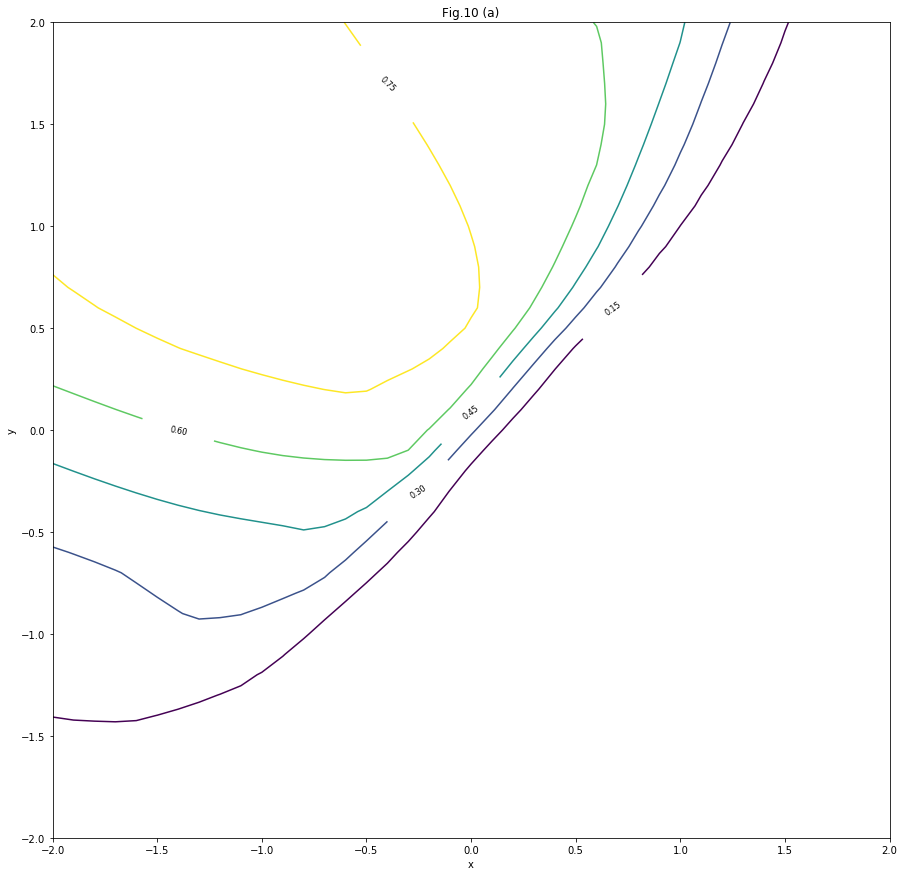

In [78]:
# Plot Figure 10 (a)

def get_m_theta_for_class_1(_px, _py):
    return get_m_theta_k(model, _px, _py, 0)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_1)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (a)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


kappa = 0.17250153204307536
kappa = 0.17250153204307536
kappa = 0.15676090717607416
kappa = 0.14060045208370067
kappa = 0.12555313406300392
kappa = 0.11262257641945271
kappa = 0.09761839564400564
kappa = 0.07652981373023175
kappa = 0.05288958867222717
kappa = 0.03479738881554043
kappa = 0.025724434130491015
kappa = 0.021164886853153788
kappa = 0.01613221444848025
kappa = 0.016510028878919693
kappa = 0.0167504116022608
kappa = 0.023153581089143664
kappa = 0.03154279519364152
kappa = 0.036913682401573215
kappa = 0.039490084274900375
kappa = 0.03964495937890559
kappa = 0.03783686574390267
kappa = 0.03575348803601275
kappa = 0.03350638515587174
kappa = 0.03128943487992972
kappa = 0.02982070406260088
kappa = 0.02860573093842779
kappa = 0.02722304918559608
kappa = 0.025975016344674744
kappa = 0.025264807459468304
kappa = 0.02453990141700914
kappa = 0.02382205745262029
kappa = 0.02312704294048014
kappa = 0.022649205280406884
kappa = 0.025283714775657468
kappa = 0.027816930561479387
kappa = 0.

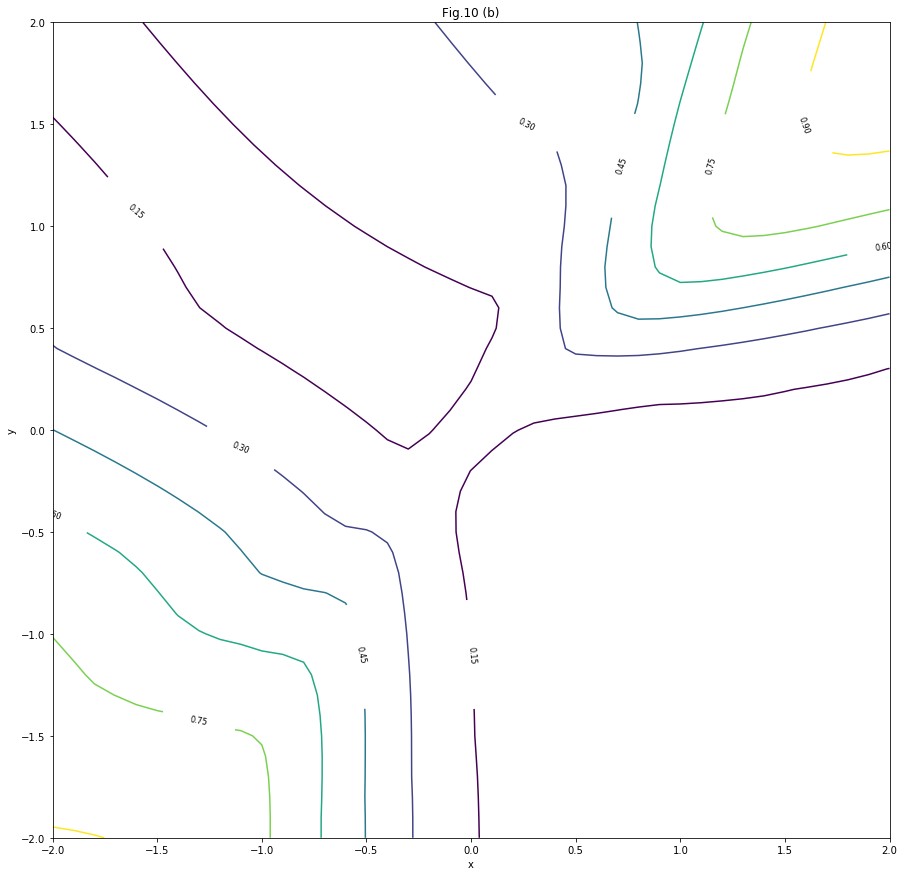

In [79]:
# Plot Figure 10 (a)

def get_m_theta_for_class_2(_px, _py):
    return get_m_theta_k(model, _px, _py, 1)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_2)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (b)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


kappa = 0.17250153204307536
kappa = 0.17250153204307536
kappa = 0.15676090717607416
kappa = 0.14060045208370067
kappa = 0.12555313406300392
kappa = 0.11262257641945271
kappa = 0.09761839564400564
kappa = 0.07652981373023175
kappa = 0.05288958867222717
kappa = 0.03479738881554043
kappa = 0.025724434130491015
kappa = 0.021164886853153788
kappa = 0.01613221444848025
kappa = 0.016510028878919693
kappa = 0.0167504116022608
kappa = 0.023153581089143664
kappa = 0.03154279519364152
kappa = 0.036913682401573215
kappa = 0.039490084274900375
kappa = 0.03964495937890559
kappa = 0.03783686574390267
kappa = 0.03575348803601275
kappa = 0.03350638515587174
kappa = 0.03128943487992972
kappa = 0.02982070406260088
kappa = 0.02860573093842779
kappa = 0.02722304918559608
kappa = 0.025975016344674744
kappa = 0.025264807459468304
kappa = 0.02453990141700914
kappa = 0.02382205745262029
kappa = 0.02312704294048014
kappa = 0.022649205280406884
kappa = 0.025283714775657468
kappa = 0.027816930561479387
kappa = 0.

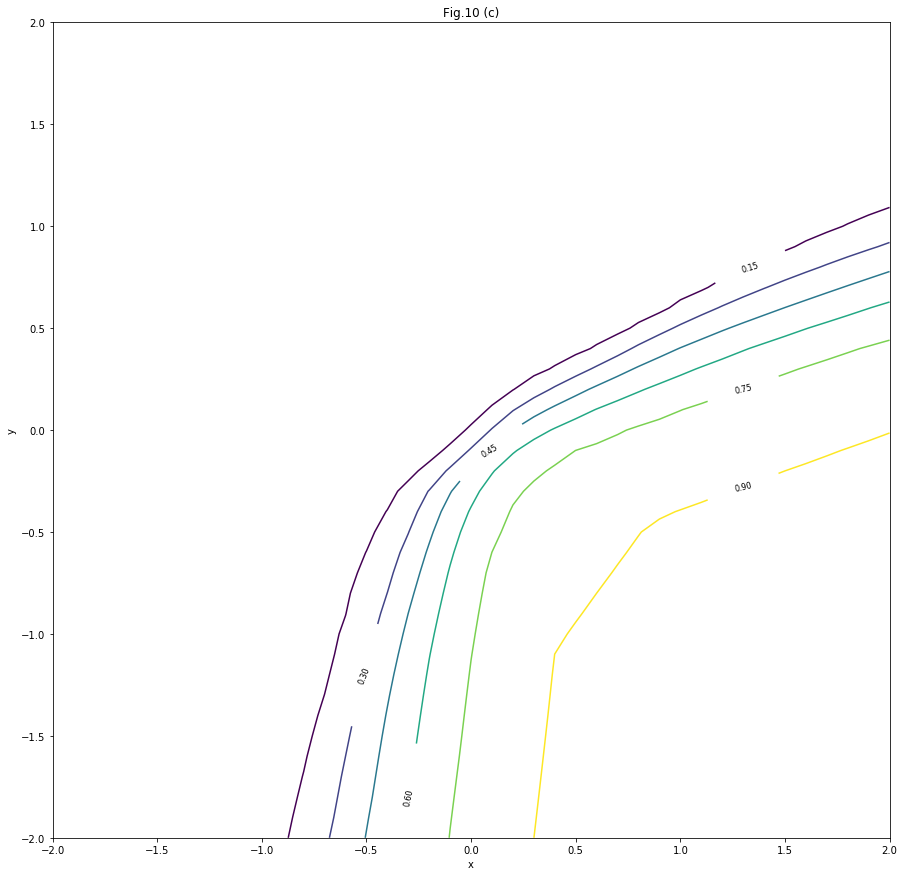

In [80]:
# Plot Figure 10 (a)

def get_m_theta_for_class_3(_px, _py):
    return get_m_theta_k(model, _px, _py, 2)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_3)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
